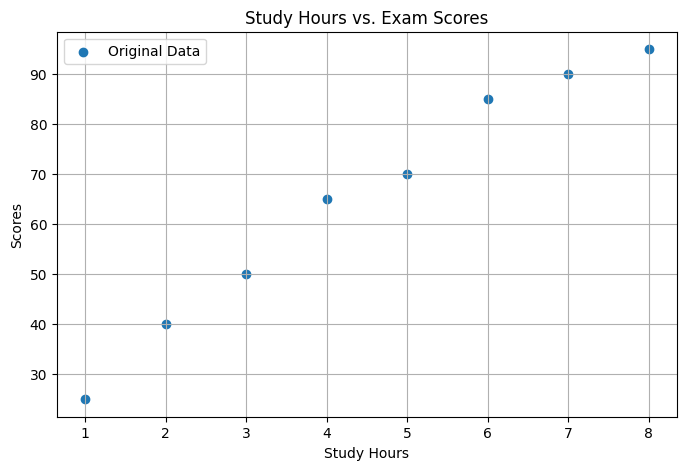

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 가상 데이터 생성: 공부 시간(X)과 성적(Y)
# 실제 데이터는 노이즈가 있으므로, 완벽한 직선이 아닌 약간의 무작위성을 추가합니다.
np.random.seed(42) # 재현성을 위해 시드 고정
x_data = np.array([1, 2, 3, 4, 5, 6, 7, 8])  # 공부 시간 (시간)
y_data = np.array([25, 40, 50, 65, 70, 85, 90, 95]) # 성적 (점)

# 데이터 시각화
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label='Original Data')
plt.title('Study Hours vs. Exam Scores')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
def gradient_descent(x, y, lr, epochs):
    """
    경사 하강법을 구현하는 함수
    :param x: 입력 데이터 (공부 시간)
    :param y: 실제 값 (성적)
    :param lr: 학습률 (learning rate)
    :param epochs: 학습 횟수
    :return: 최종 W, b와 학습 과정의 비용 리스트
    """
    # 1. W와 b를 임의의 값으로 초기화
    W = 0.0
    b = 0.0
    n = len(x)
    
    cost_history = [] # 비용 변화를 기록할 리스트

    # 2. 정해진 학습 횟수(epochs)만큼 반복
    for i in range(epochs):
        # 3. 가설(예측값) 계산
        hypothesis = W * x + b
        
        # 4. 비용(오차) 계산
        cost = np.sum((hypothesis - y) ** 2) / n
        cost_history.append(cost)
        
        # 5. 미분을 통해 기울기(gradient) 계산
        gradient_w = np.sum((hypothesis - y) * 2 * x) / n
        gradient_b = np.sum((hypothesis - y) * 2) / n
        
        # 6. W와 b 업데이트
        W = W - lr * gradient_w
        b = b - lr * gradient_b
        
        # 학습 과정 출력 (100번마다)
        if (i+1) % 100 == 0:
            print(f"Epoch {i+1:4d} | Cost: {cost:.4f}, W: {W:.4f}, b: {b:.4f}")
            
    return W, b, cost_history

In [3]:
# 학습 파라미터 설정
learning_rate_1 = 0.01
epochs = 1000

# 모델 학습 실행
W1, b1, cost_history1 = gradient_descent(x_data, y_data, learning_rate_1, epochs)

print(f"\n[Final Result with lr={learning_rate_1}] W: {W1:.4f}, b: {b1:.4f}\n")

Epoch  100 | Cost: 39.7709, W: 12.1604, b: 7.9869
Epoch  200 | Cost: 24.7118, W: 11.4874, b: 11.7710
Epoch  300 | Cost: 17.9458, W: 11.0362, b: 14.3075
Epoch  400 | Cost: 14.9058, W: 10.7338, b: 16.0077
Epoch  500 | Cost: 13.5400, W: 10.5311, b: 17.1473
Epoch  600 | Cost: 12.9263, W: 10.3953, b: 17.9112
Epoch  700 | Cost: 12.6506, W: 10.3042, b: 18.4233
Epoch  800 | Cost: 12.5267, W: 10.2432, b: 18.7665
Epoch  900 | Cost: 12.4710, W: 10.2022, b: 18.9966
Epoch 1000 | Cost: 12.4460, W: 10.1748, b: 19.1508

[Final Result with lr=0.01] W: 10.1748, b: 19.1508



In [4]:
# 학습 파라미터 설정
learning_rate_2 = 0.05
epochs = 100 # 발산은 빠르게 일어나므로 epoch를 줄여도 됨

# 모델 학습 실행
W2, b2, cost_history2 = gradient_descent(x_data, y_data, learning_rate_2, epochs)

print(f"\n[Final Result with lr={learning_rate_2}] W: {W2:.4f}, b: {b2:.4f}\n")

Epoch  100 | Cost: 4869313255660868738641737571643272120164679680.0000, W: -21836727391576385388544.0000, b: -3883944078369905180672.0000

[Final Result with lr=0.05] W: -21836727391576385388544.0000, b: -3883944078369905180672.0000



In [5]:
# 학습 파라미터 설정
learning_rate_3 = 0.0001
epochs = 1000

# 모델 학습 실행
W3, b3, cost_history3 = gradient_descent(x_data, y_data, learning_rate_3, epochs)

print(f"\n[Final Result with lr={learning_rate_3}] W: {W3:.4f}, b: {b3:.4f}\n")

Epoch  100 | Cost: 1727.3024, W: 5.3835, b: 1.0279
Epoch  200 | Cost: 648.2207, W: 8.5556, b: 1.6622
Epoch  300 | Cost: 272.1077, W: 10.4227, b: 2.0641
Epoch  400 | Cost: 140.8165, W: 11.5196, b: 2.3288
Epoch  500 | Cost: 94.7905, W: 12.1621, b: 2.5123
Epoch  600 | Cost: 78.4619, W: 12.5364, b: 2.6479
Epoch  700 | Cost: 72.4781, W: 12.7525, b: 2.7550
Epoch  800 | Cost: 70.0995, W: 12.8752, b: 2.8453
Epoch  900 | Cost: 68.9787, W: 12.9428, b: 2.9255
Epoch 1000 | Cost: 68.2984, W: 12.9779, b: 2.9996

[Final Result with lr=0.0001] W: 12.9779, b: 2.9996



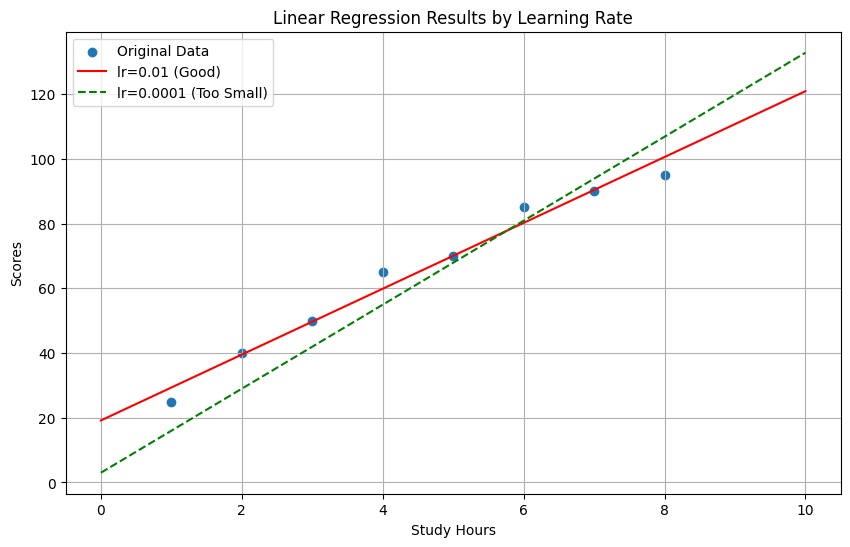

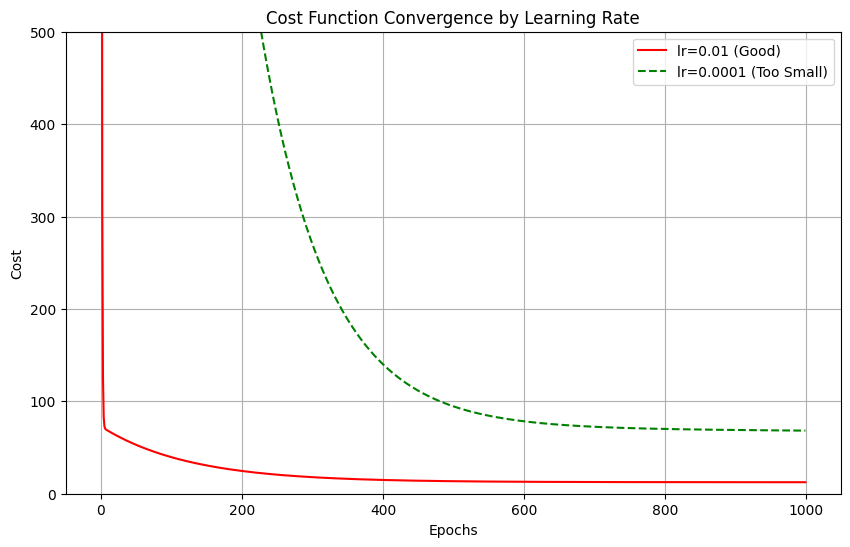

In [6]:
# 1. 학습된 선형 회귀 모델 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Original Data')

# 각 실험 결과로 얻은 직선 그리기
x_range = np.array([0, 10])

# 실험 1: 적절한 학습률
line1 = W1 * x_range + b1
plt.plot(x_range, line1, 'r-', label=f'lr={learning_rate_1} (Good)')

# 실험 3: 너무 작은 학습률
line3 = W3 * x_range + b3
plt.plot(x_range, line3, 'g--', label=f'lr={learning_rate_3} (Too Small)')

plt.title('Linear Regression Results by Learning Rate')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()


# 2. Epoch에 따른 비용(Cost) 변화 시각화
plt.figure(figsize=(10, 6))
plt.plot(cost_history1, 'r-', label=f'lr={learning_rate_1} (Good)')
# plt.plot(cost_history2, 'b-', label=f'lr={learning_rate_2} (Too Large)') # 주석 해제 시 발산 확인 가능
plt.plot(cost_history3, 'g--', label=f'lr={learning_rate_3} (Too Small)')

plt.title('Cost Function Convergence by Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.ylim(0, 500) # y축 범위를 조절하여 비교 용이하게 함
plt.grid(True)
plt.show()